In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer, Dropout, MomentumLinearLayer
from scratchNNlib.Layers.ActivationLayers import ReLU, Softmax, Sigmoid
from scratchNNlib.Loss import BinaryCrossEntropy

In [2]:
def one_hot_encode(num: int, size: int = 10):
    out = np.zeros((1, size))
    out[0][num] =+ 1
    return out

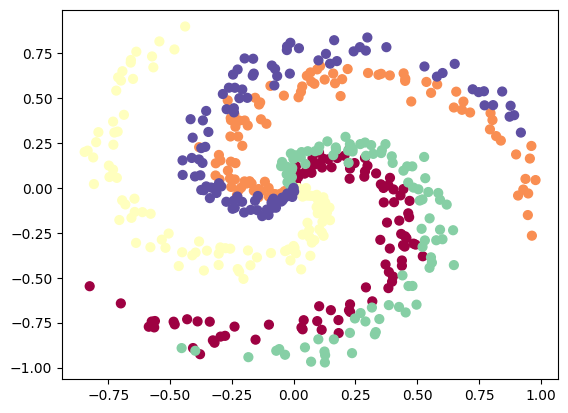

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [14]:
class SpiralNeural(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            LinearLayer(2, 16),
            ReLU(),
            Dropout(0.5),
            LinearLayer(16, 16),
            ReLU(),
            Dropout(0.5),
            LinearLayer(16, 8),
            ReLU(),
            LinearLayer(8, K),
            Softmax(),
        ]

class SpiralNeuralMomentum(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            MomentumLinearLayer(2, 16),
            ReLU(),
            Dropout(0.5),
            MomentumLinearLayer(16, 16),
            ReLU(),
            Dropout(0.5),
            MomentumLinearLayer(16, 8),
            ReLU(),
            MomentumLinearLayer(8, K),
            Softmax(),
        ]

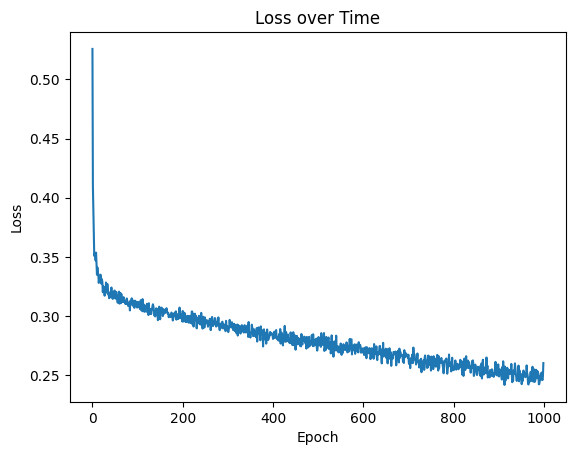

In [20]:
X = X.reshape(N * K, 1, 2)
y = y.reshape(N * K, 1, 1)

if __name__ == "__main__":
    epochs = 1000
    lr = 1e-3
    
    loss_function = BinaryCrossEntropy()
    model = SpiralNeuralMomentum()
    
    samples = len(X)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for sample in range(samples):
            output = model.forwardProp(X[sample].T)
            #print(f'NN output: {output}, expected value: {one_hot_encode(y[sample], size = 3).T}')
            #print(f'sample: {X[sample].T}')

            error += loss_function(output, one_hot_encode(y[sample], size = K).T)
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        #print('epoch %d/%d   error=%f' % (i+1, epochs, error))

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [21]:
X = X.reshape(N * K, 1, 2)

scores = []
for x in X:
    scores.append(model.forwardProp(x.T, training = False))
predicted_class = np.argmax(scores, axis=1)
y = y.reshape(N * K, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.34


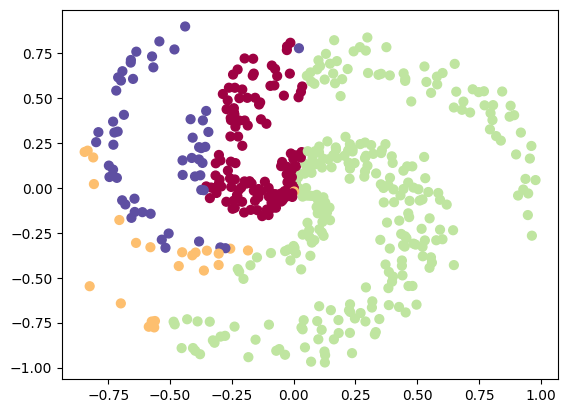

In [22]:
X = X.reshape(N * K, 2)
y = y.reshape(N * K, 1)
plt.scatter(X[:, 0], X[:, 1], c=predicted_class.T, s=40, cmap=plt.cm.Spectral)
plt.show()

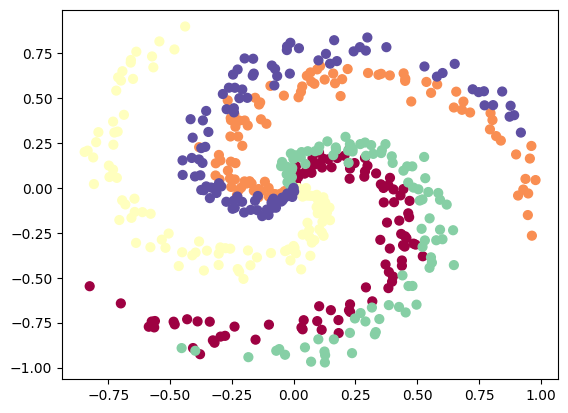

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()